In [44]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from matplotlib import style
netCDF4.__version__
%matplotlib inline

In [47]:
style.use('../stylefiles/socib.mplstyle')

In [28]:
datafile = "http://thredds.priv.socib.es/thredds/dodsC/testCmunoz/dep0002_socib-rv_scb-rdi001_L1_latest.nc"

In [97]:
with netCDF4.Dataset(datafile) as nc:
    lonname = nc.get_variables_by_attributes(standard_name='longitude')[0].name
    latname = nc.get_variables_by_attributes(standard_name='latitude')[0].name
    timename = nc.get_variables_by_attributes(standard_name='time')[0].name
    depthname = nc.get_variables_by_attributes(standard_name='depth')[0].name
    vvelname = nc.get_variables_by_attributes(standard_name='northward_sea_water_velocity')[0].name
    uvelname = nc.get_variables_by_attributes(standard_name='eastward_sea_water_velocity')[0].name
    
    lon = nc.variables[lonname][:]
    lat = nc.variables[latname][:]
    time = nc.variables[timename][:]
    timeunits = nc.variables[timename].units
    depth = nc.variables[depthname][:]
    uvel = nc.variables[uvelname][:]
    vvel = nc.variables[vvelname][:]

## Select specific area

In [101]:
goodcoord = np.where( (lon >= 0.3) & (lon <= 1.) & (lat >= 38.78) & (lat <= 38.82) )[0]
lon2, lat2 = lon[goodcoord], lat[goodcoord]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


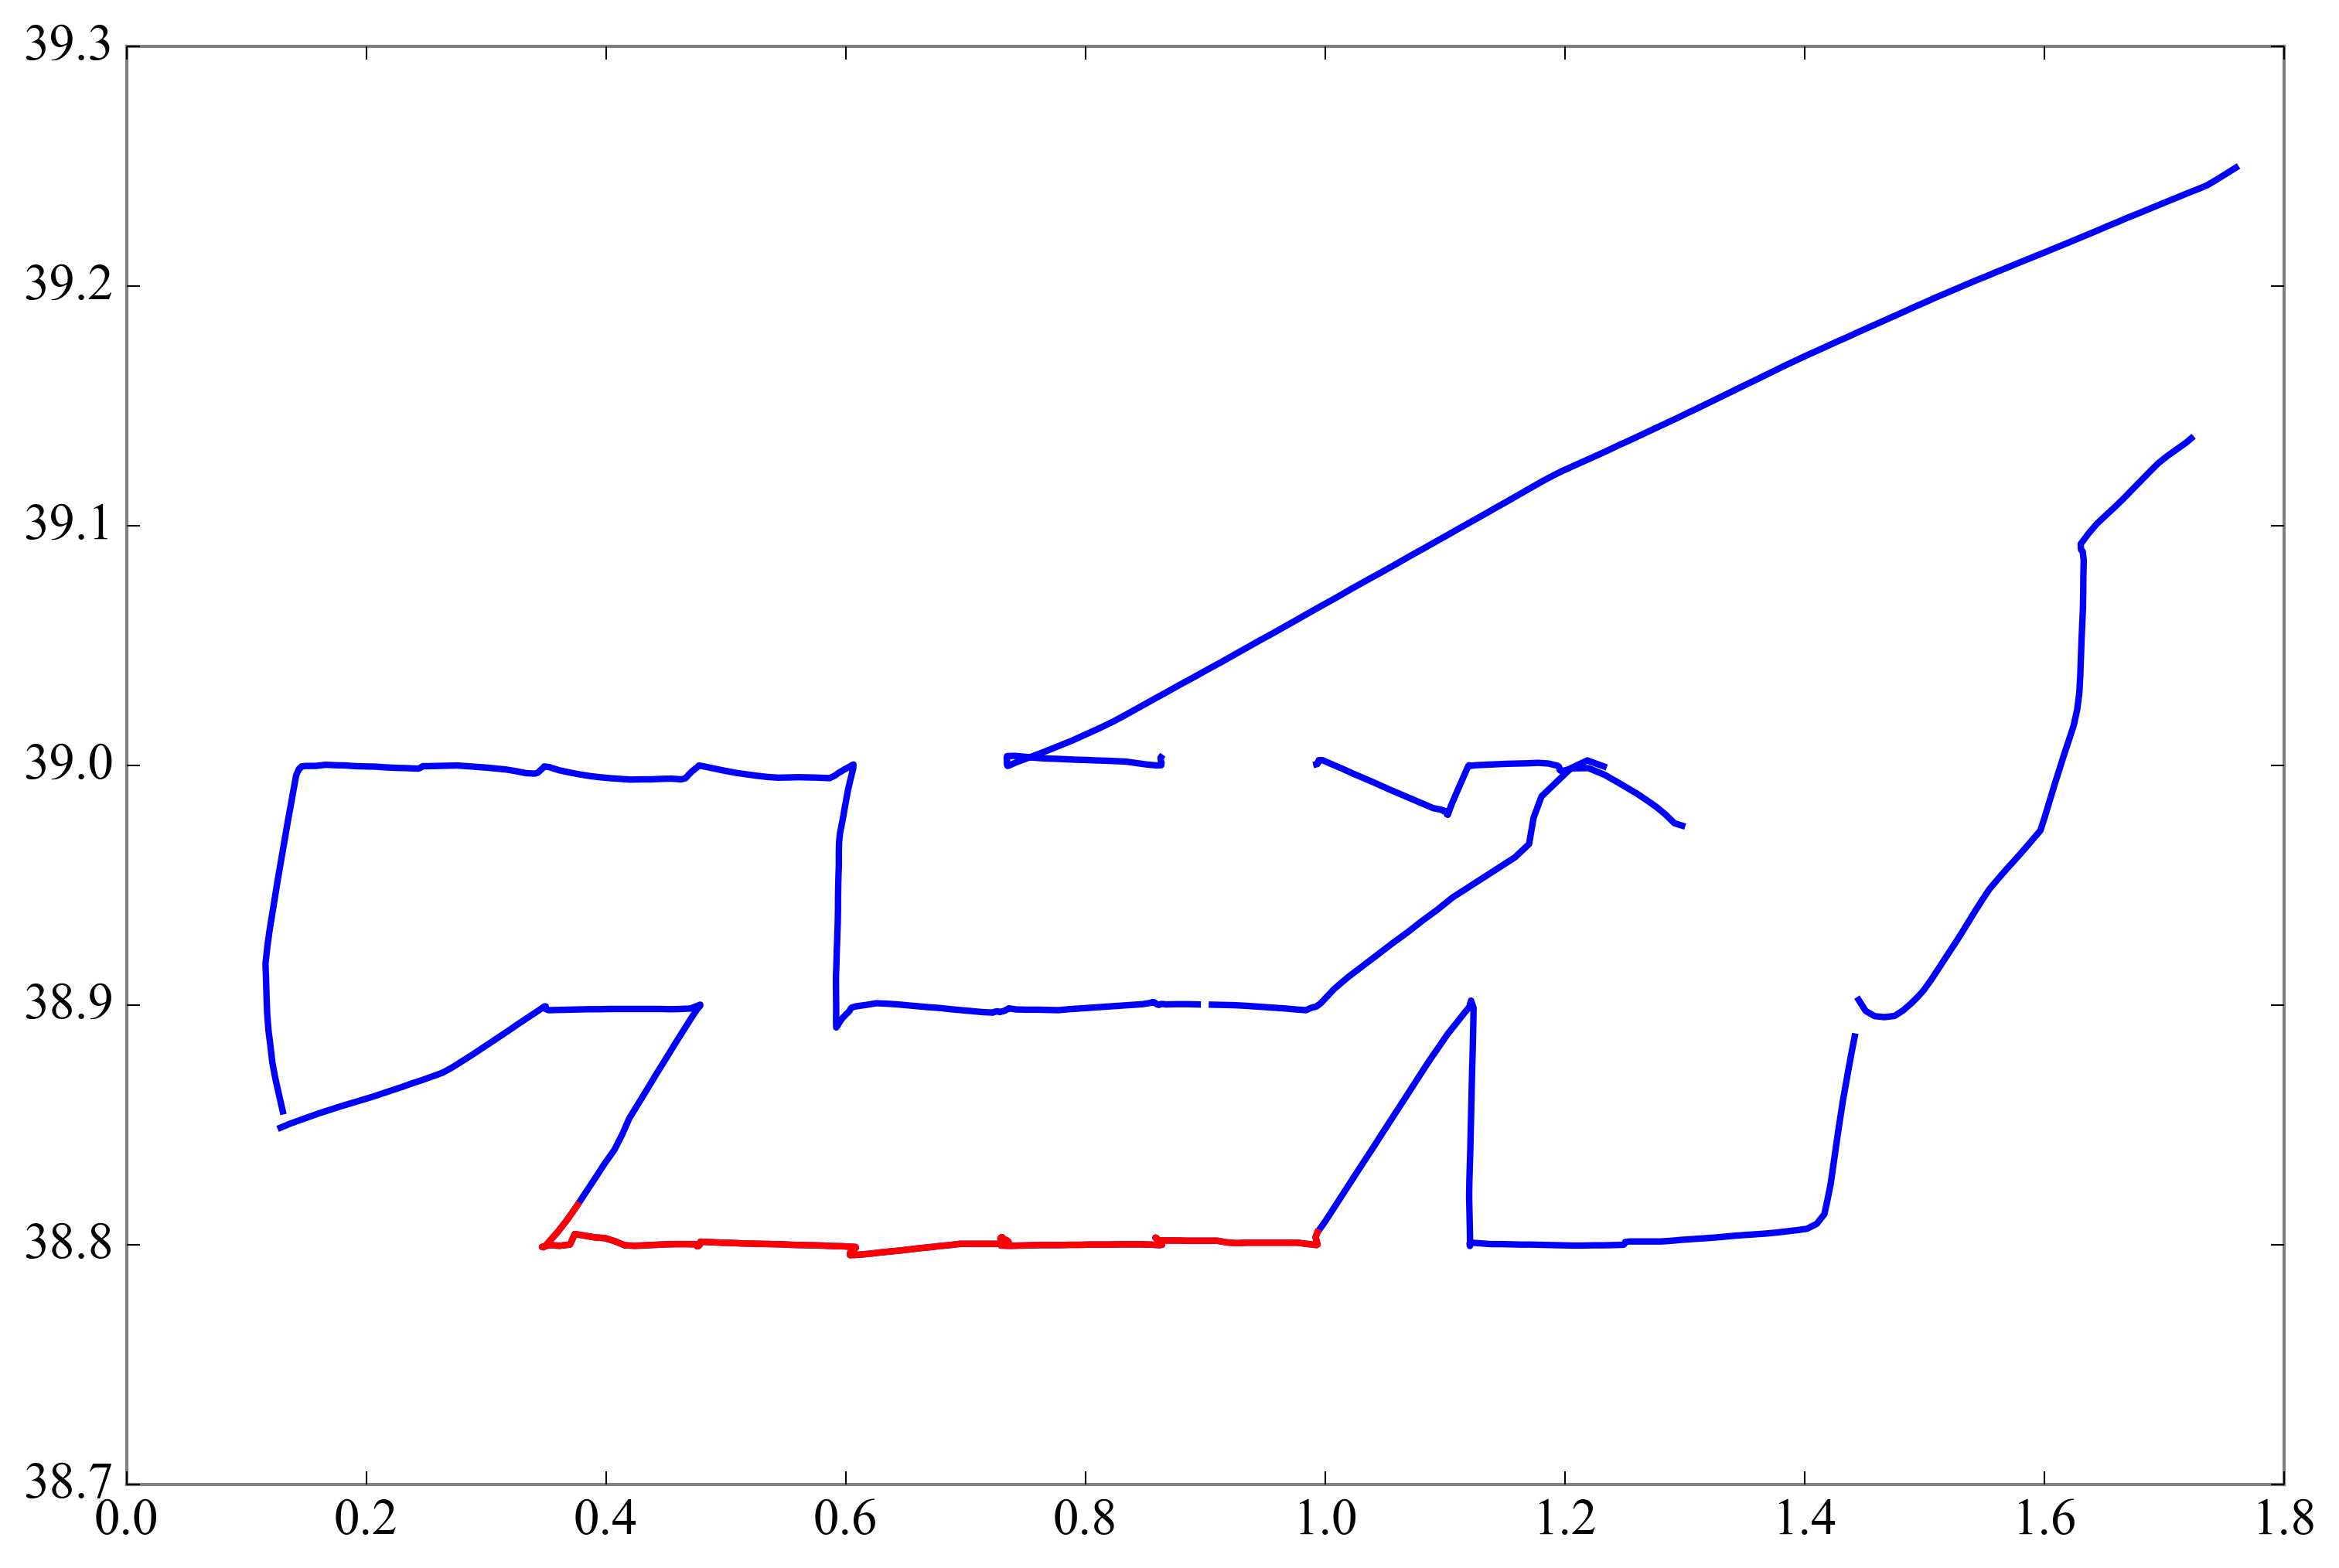

In [102]:
plt.plot(lon, lat)
plt.plot(lon2, lat2, 'r')
plt.show()

# Plot ADCP section

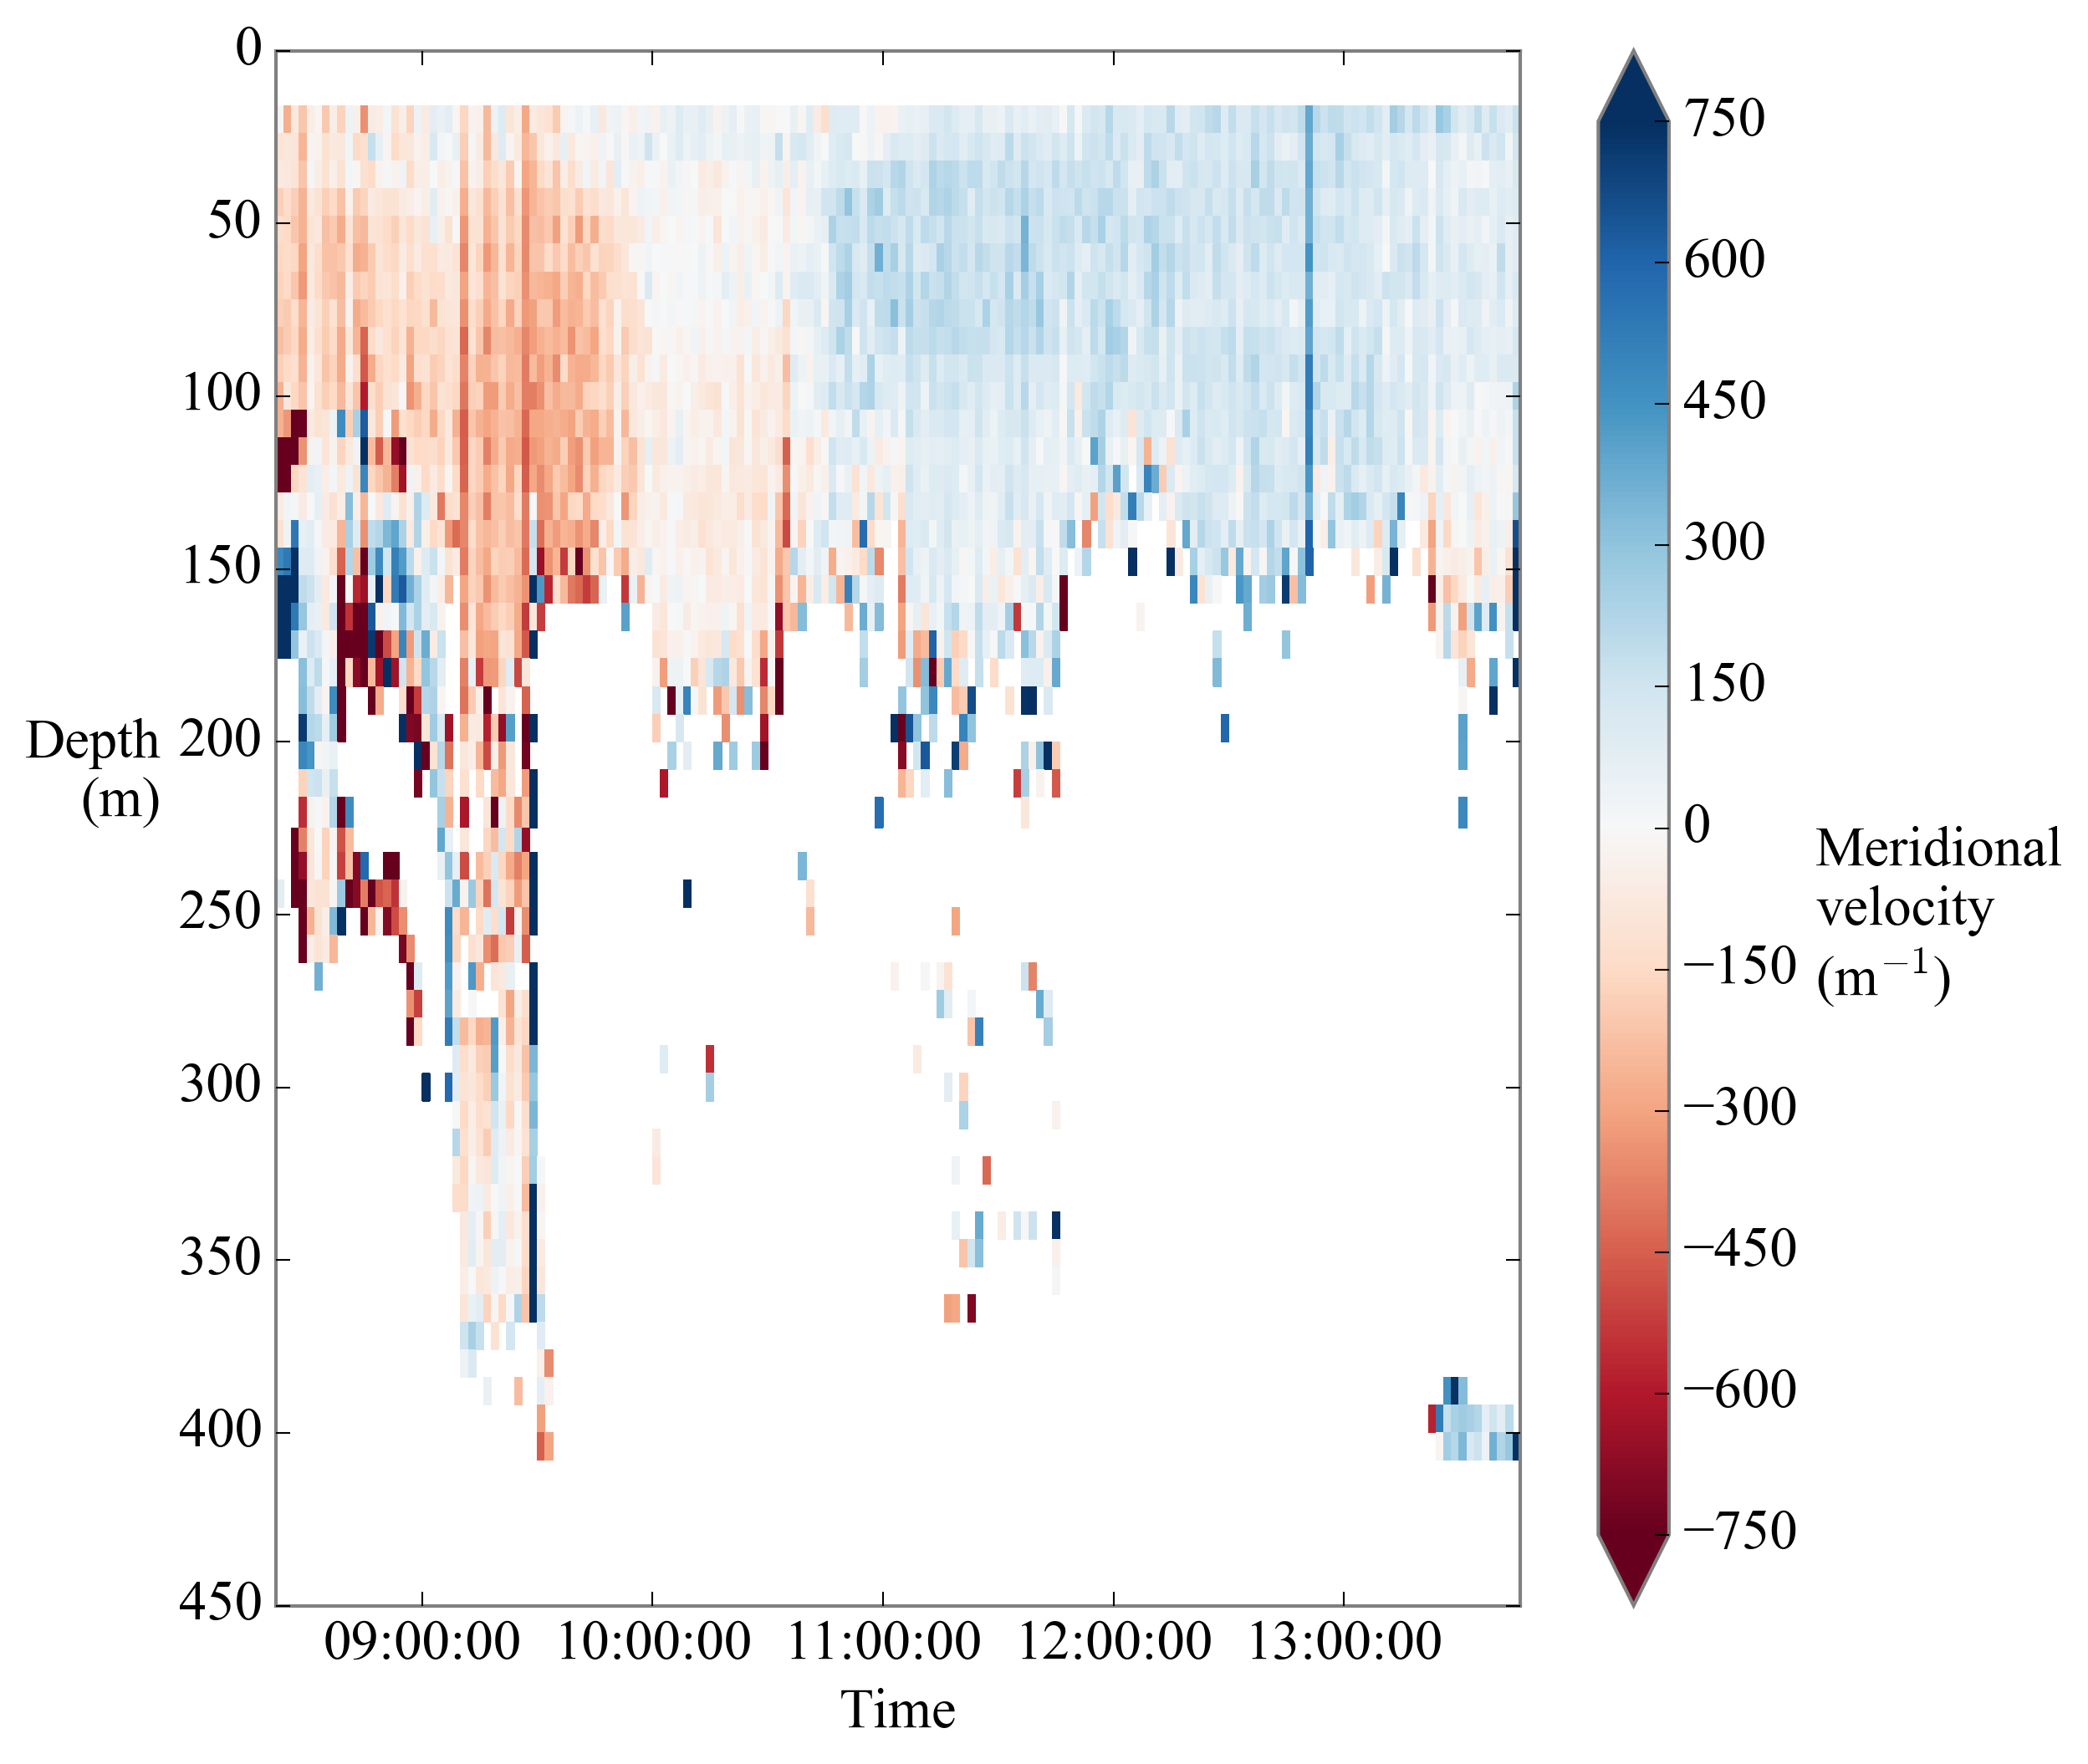

In [104]:
vvel = np.ma.masked_where(np.isnan(vvel), vvel)
fig = plt.figure(figsize=(8, 8))
dates = netCDF4.num2date(time[goodcoord], timeunits)
plt.pcolormesh(dates, depth, vvel[goodcoord].T, vmin=-750., vmax=750., cmap=plt.cm.RdBu)
plt.gca().invert_yaxis()
plt.xlabel('Time')
plt.ylabel('Depth\n(m)', rotation=0, ha='right')
cbar = plt.colorbar(extend='both')
cbar.set_label('Meridional\nvelocity\n(m$^{-1}$)', rotation=0, ha='left')
plt.show()